In this short work, we are going to revisit the Linear Ordering Problem, where best ranking classifications are considered among a variety of criteria.

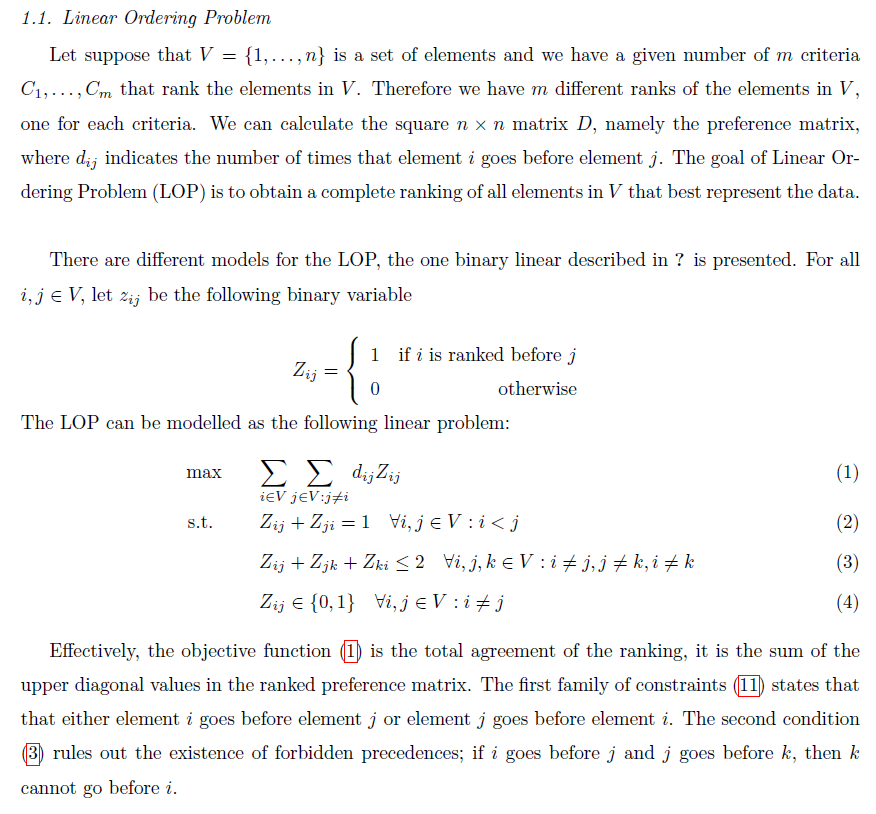

Once we have a LOP, we can extract its preference matrix. We are going to solve the best possible ranking with:
1. Brute force Python
2. Optimisation problem

Based on the following example:

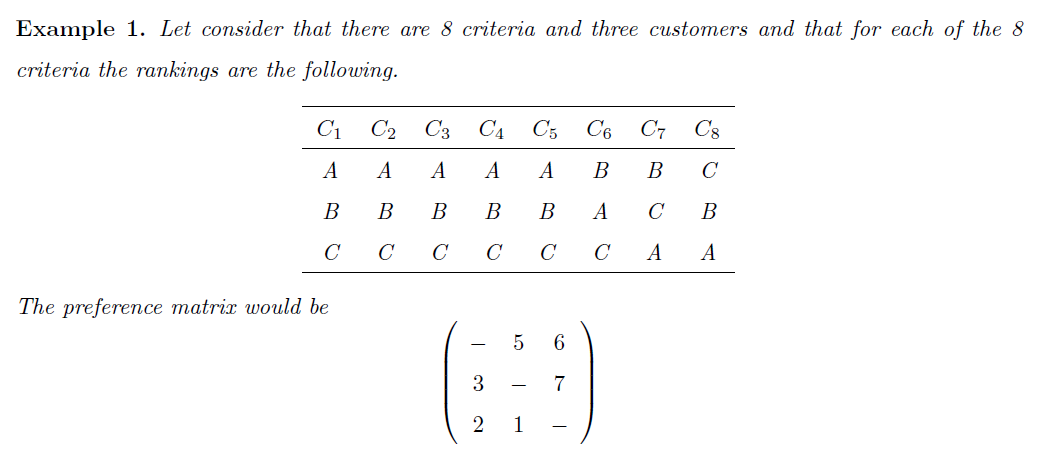

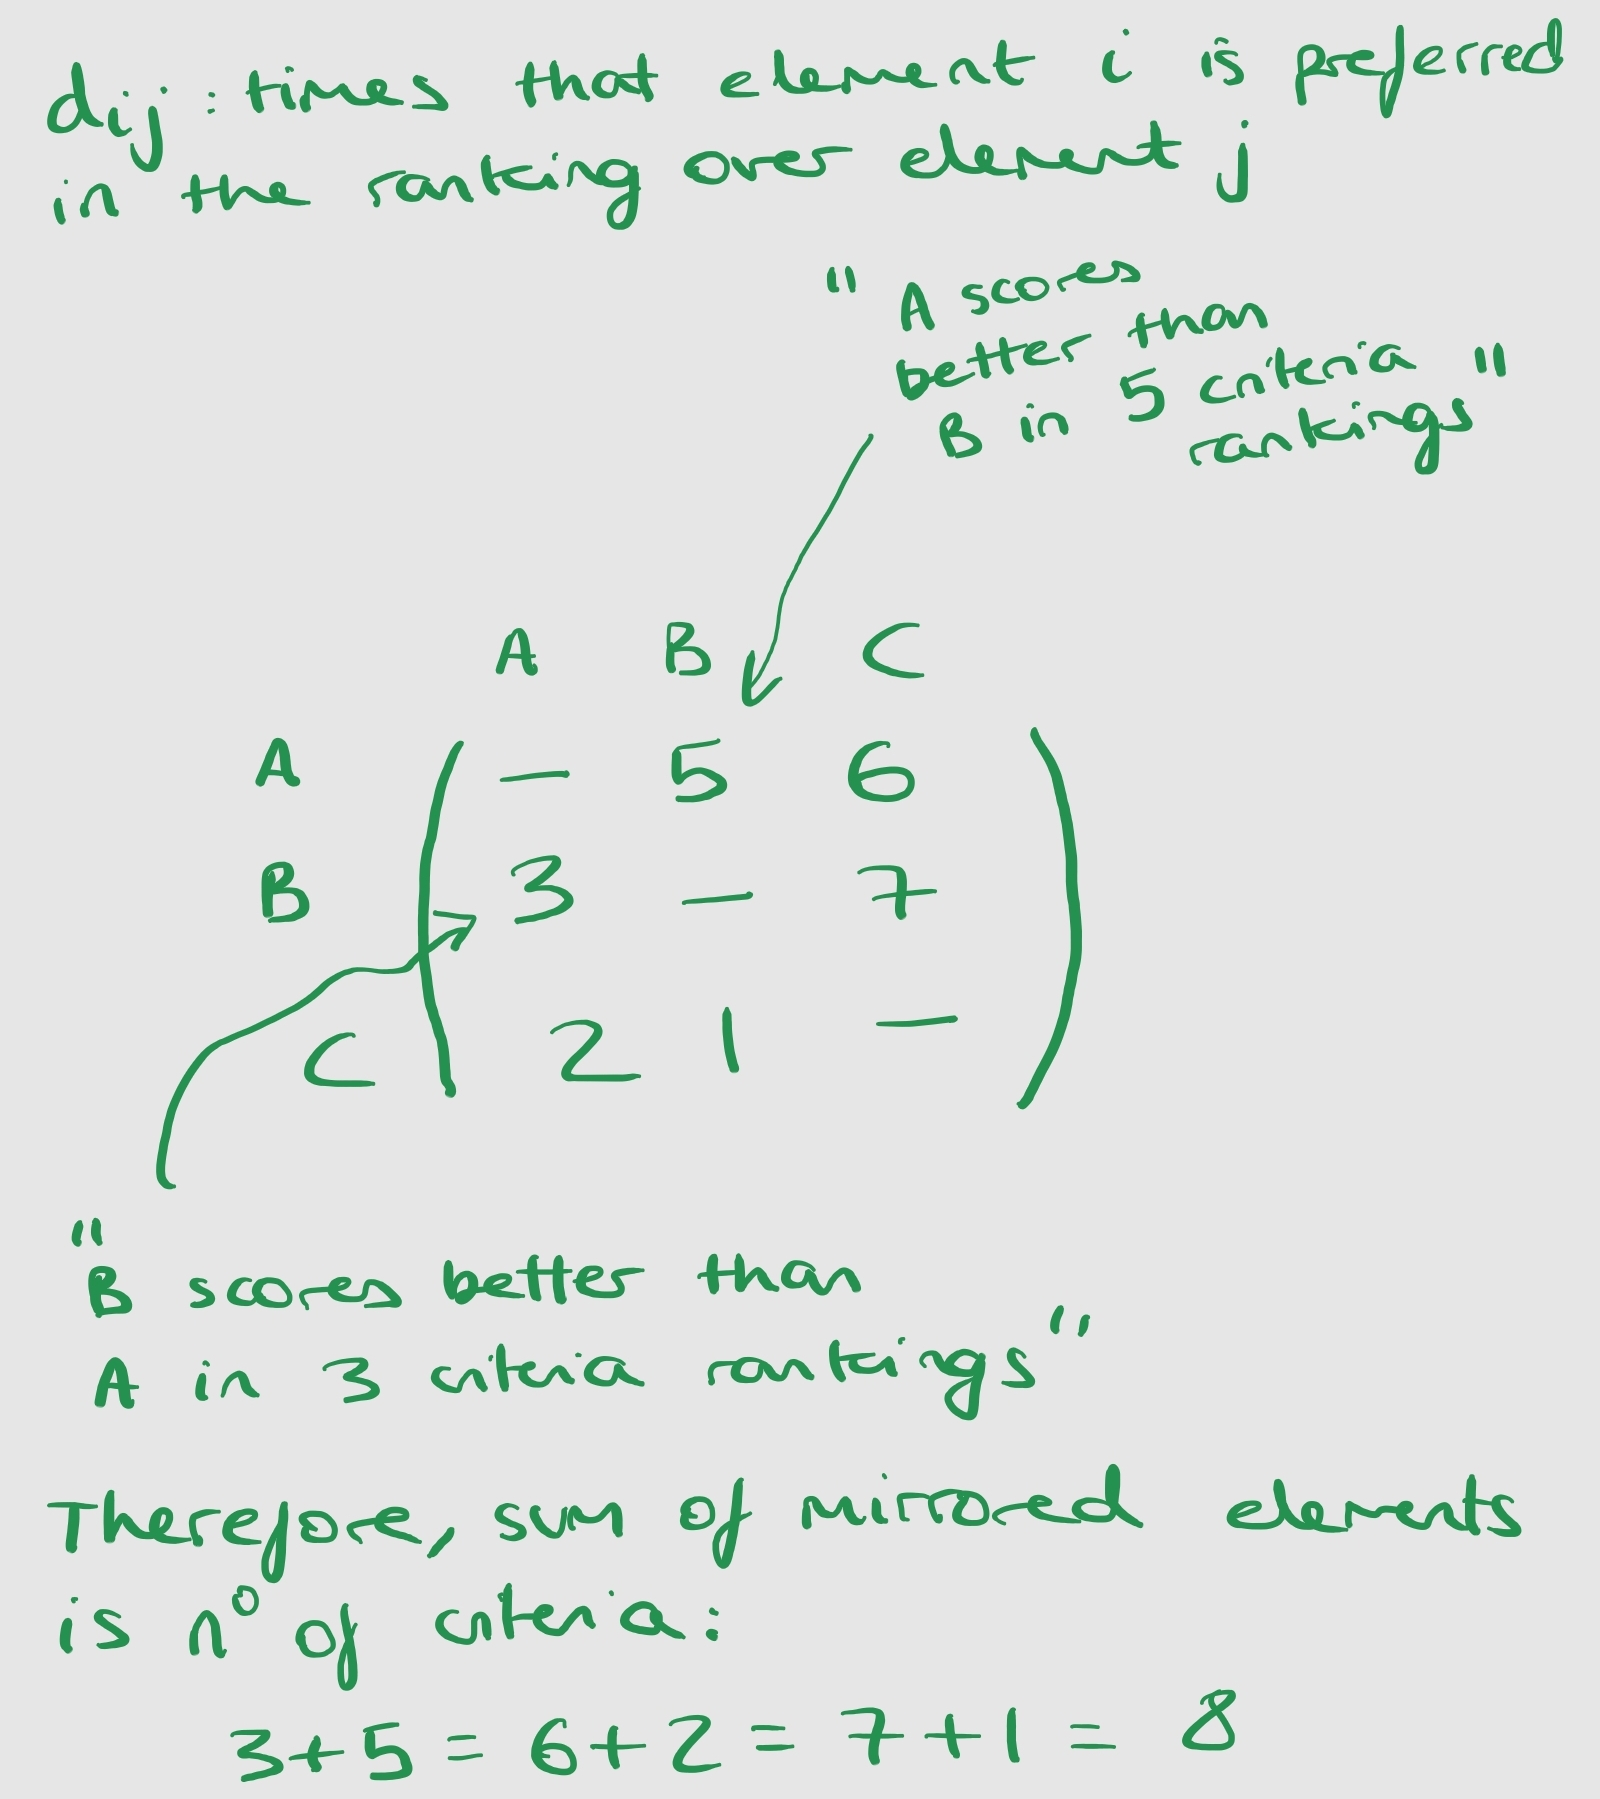

--------------
# 1. Brute force Python

In [1]:
import numpy as np
from itertools import product
import math
from itertools import permutations

In [2]:
#We input the basis preference matrix

preference_matrix={(1,1):0,(1,2):5,(1,3):6,(2,1):3,(2,2):0,(2,3):7,(3,1):2,(3,2):1,(3,3):0}

1. Dirty version that extracts the whole matrix list and then calculates best LOP

In [3]:
#We calculate the combination of existing indeces

order_matrix=int(math.sqrt(len(preference_matrix)))
array= np.arange(1,order_matrix+1)
all_permutations=list(permutations(array))
combinations=list(product(all_permutations, all_permutations))
print(np.array(combinations))

[[[1 2 3]
  [1 2 3]]

 [[1 2 3]
  [1 3 2]]

 [[1 2 3]
  [2 1 3]]

 [[1 2 3]
  [2 3 1]]

 [[1 2 3]
  [3 1 2]]

 [[1 2 3]
  [3 2 1]]

 [[1 3 2]
  [1 2 3]]

 [[1 3 2]
  [1 3 2]]

 [[1 3 2]
  [2 1 3]]

 [[1 3 2]
  [2 3 1]]

 [[1 3 2]
  [3 1 2]]

 [[1 3 2]
  [3 2 1]]

 [[2 1 3]
  [1 2 3]]

 [[2 1 3]
  [1 3 2]]

 [[2 1 3]
  [2 1 3]]

 [[2 1 3]
  [2 3 1]]

 [[2 1 3]
  [3 1 2]]

 [[2 1 3]
  [3 2 1]]

 [[2 3 1]
  [1 2 3]]

 [[2 3 1]
  [1 3 2]]

 [[2 3 1]
  [2 1 3]]

 [[2 3 1]
  [2 3 1]]

 [[2 3 1]
  [3 1 2]]

 [[2 3 1]
  [3 2 1]]

 [[3 1 2]
  [1 2 3]]

 [[3 1 2]
  [1 3 2]]

 [[3 1 2]
  [2 1 3]]

 [[3 1 2]
  [2 3 1]]

 [[3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 2 1]]

 [[3 2 1]
  [1 2 3]]

 [[3 2 1]
  [1 3 2]]

 [[3 2 1]
  [2 1 3]]

 [[3 2 1]
  [2 3 1]]

 [[3 2 1]
  [3 1 2]]

 [[3 2 1]
  [3 2 1]]]


In [4]:
#We calculate the matrices resulting from the combination of those indeces

possible_matrices=list()
for i,j in combinations:     #i represents the order of the rows, and j the order of the columns
  runtime_matrix = dict()
  a=1
  for k in i:
    b=1
    for l in j:
      runtime_matrix[(a,b)] = preference_matrix[(k,l)]
      b += 1
    a+=1
  possible_matrices.append(runtime_matrix)
  print(runtime_matrix)

{(1, 1): 0, (1, 2): 5, (1, 3): 6, (2, 1): 3, (2, 2): 0, (2, 3): 7, (3, 1): 2, (3, 2): 1, (3, 3): 0}
{(1, 1): 0, (1, 2): 6, (1, 3): 5, (2, 1): 3, (2, 2): 7, (2, 3): 0, (3, 1): 2, (3, 2): 0, (3, 3): 1}
{(1, 1): 5, (1, 2): 0, (1, 3): 6, (2, 1): 0, (2, 2): 3, (2, 3): 7, (3, 1): 1, (3, 2): 2, (3, 3): 0}
{(1, 1): 5, (1, 2): 6, (1, 3): 0, (2, 1): 0, (2, 2): 7, (2, 3): 3, (3, 1): 1, (3, 2): 0, (3, 3): 2}
{(1, 1): 6, (1, 2): 0, (1, 3): 5, (2, 1): 7, (2, 2): 3, (2, 3): 0, (3, 1): 0, (3, 2): 2, (3, 3): 1}
{(1, 1): 6, (1, 2): 5, (1, 3): 0, (2, 1): 7, (2, 2): 0, (2, 3): 3, (3, 1): 0, (3, 2): 1, (3, 3): 2}
{(1, 1): 0, (1, 2): 5, (1, 3): 6, (2, 1): 2, (2, 2): 1, (2, 3): 0, (3, 1): 3, (3, 2): 0, (3, 3): 7}
{(1, 1): 0, (1, 2): 6, (1, 3): 5, (2, 1): 2, (2, 2): 0, (2, 3): 1, (3, 1): 3, (3, 2): 7, (3, 3): 0}
{(1, 1): 5, (1, 2): 0, (1, 3): 6, (2, 1): 1, (2, 2): 2, (2, 3): 0, (3, 1): 0, (3, 2): 3, (3, 3): 7}
{(1, 1): 5, (1, 2): 6, (1, 3): 0, (2, 1): 1, (2, 2): 0, (2, 3): 2, (3, 1): 0, (3, 2): 7, (3, 3): 3}


In [5]:
#We calculate the coordinates of the elements in each matrix to extract, sum and evaluate the largest number

elements_extract=[]
counter=2
for i in range(1,order_matrix):
  for j in reversed(range(counter,order_matrix+1)):
    elements_extract.append([i,j])
  counter+=1
print(elements_extract)

[[1, 3], [1, 2], [2, 3]]


In [6]:
#We iterate all the matrices, get the sums of the elements, and evaluate which is better
best_matrix=0
best_score=0
for element in possible_matrices:
  score_acum=0
  for position in elements_extract:
    score_acum=score_acum+element[(position[0],position[1])]

  if score_acum>best_score:
    best_score=score_acum
    best_matrix=element

print(best_score)
print(best_matrix)

18
{(1, 1): 0, (1, 2): 5, (1, 3): 6, (2, 1): 3, (2, 2): 0, (2, 3): 7, (3, 1): 2, (3, 2): 1, (3, 3): 0}


In [7]:
#We generalise this as a function that gets as input a matrix and throws out the combination

def my_function(matrix):
  order_matrix=int(math.sqrt(len(matrix)))
  array= np.arange(1,order_matrix+1)
  all_permutations=list(permutations(array))
  combinations=list(product(all_permutations, all_permutations))
  possible_matrices=list()

  for i,j in combinations:     #i represents the order of the rows, and j the order of the columns
    runtime_matrix = dict()
    a=1
    for k in i:
      b=1
      for l in j:
        runtime_matrix[(a,b)] = matrix[(k,l)]
        b += 1
      a+=1
    possible_matrices.append(runtime_matrix)

  elements_extract=[]
  counter=2
  for i in range(1,order_matrix):
    for j in reversed(range(counter,order_matrix+1)):
      elements_extract.append([i,j])
    counter+=1

  best_matrix=0
  best_score=0
  for element in possible_matrices:
    score_acum=0
    for position in elements_extract:
      score_acum=score_acum+element[(position[0],position[1])]
    if score_acum>best_score:
      best_score=score_acum
      best_matrix=element
  return best_matrix, best_score

In [8]:
#We try another matrix, from "The linear ordering problem revisited", Ceberio et al.

preference_matrix2={(1,1):0,(1,2):16,(1,3):11,(1,4):15,(1,5):7,
                    (2,1):21,(2,2):0,(2,3):14,(2,4):15,(2,5):9,
                    (3,1):26,(3,2):23,(3,3):0,(3,4):26,(3,5):12,
                    (4,1):22,(4,2):22,(4,3):11,(4,4):0,(4,5):13,
                    (5,1):30,(5,2):28,(5,3):25,(5,4):24,(5,5):0}
best_matrix, best_score=my_function(preference_matrix2)
print(best_matrix)
print(best_score)

{(1, 1): 0, (1, 2): 25, (1, 3): 24, (1, 4): 28, (1, 5): 30, (2, 1): 12, (2, 2): 0, (2, 3): 26, (2, 4): 23, (2, 5): 26, (3, 1): 13, (3, 2): 11, (3, 3): 0, (3, 4): 22, (3, 5): 22, (4, 1): 9, (4, 2): 14, (4, 3): 15, (4, 4): 0, (4, 5): 21, (5, 1): 7, (5, 2): 11, (5, 3): 15, (5, 4): 16, (5, 5): 0}
247


This resulting matrix and score matches with the solution provided in Ceberio et al, where sigma* indicates the optimum value

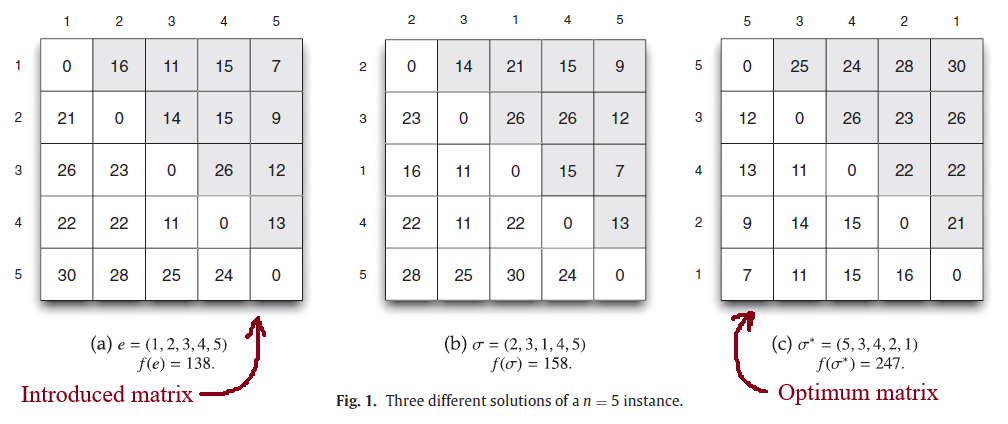

--------------
# 2. Operations Research model

In [9]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [10]:
import math
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [11]:
#Defining the model
preference_matrix={(1,1):0,(1,2):5,(1,3):6,(2,1):3,(2,2):0,(2,3):7,(3,1):2,(3,2):1,(3,3):0}

model = pyo.ConcreteModel()

In [12]:
#Defining the sets
order_matrix=int(math.sqrt(len(preference_matrix)))
model.i=pyo.RangeSet(1,order_matrix,1)
model.j=pyo.RangeSet(1,order_matrix,1)
model.k=pyo.RangeSet(1,order_matrix,1)

In [13]:
#Defining the parameters
model.D = pyo.Param(model.i,model.j, initialize=preference_matrix)
D = model.D

In [14]:
#Decision variables

model.z=pyo.Var(model.i,model.j, domain=pyo.Binary, initialize=0)
z=model.z

In [15]:
#Objective rule and constraints
def Objective_rule(model):
  return sum(sum(D[i,j]*z[i,j] if j!=i else 0 for j in model.j) for i in model.i)
model.Obj = pyo.Objective(rule=Objective_rule, sense = pyo.maximize)

def Constraint1(model,i,j):
  return z[i,j]+z[j,i] == 1 if i<j else pyo.Constraint.Skip
model.Const1 = pyo.Constraint(model.i,model.j,rule=Constraint1)

def Constraint2(model,i,j,k):
  return z[i,j]+z[j,k]+z[k,i] <= 2 if (i!=j and j!=k and i!=k) else pyo.Constraint.Skip
model.Const2 = pyo.Constraint(model.i,model.j,model.k,rule=Constraint2)

In [16]:
optm = SolverFactory('glpk')
results=optm.solve(model)

In [17]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 18.0
  Upper bound: 18.0
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 6
  Number of nonzeros: 24
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.029479265213012695
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [18]:
print("objective function: ", model.Obj())
for i,j in z:
    print('Is variable ',i,' better than ',j,'?: ', "yes" if z[i,j]()==1 else "no")

objective function:  18.0
Is variable  1  better than  1 ?:  no
Is variable  1  better than  2 ?:  yes
Is variable  1  better than  3 ?:  yes
Is variable  2  better than  1 ?:  no
Is variable  2  better than  2 ?:  no
Is variable  2  better than  3 ?:  yes
Is variable  3  better than  1 ?:  no
Is variable  3  better than  2 ?:  no
Is variable  3  better than  3 ?:  no


In [19]:
#We generalise this as a function that gets as input a matrix and throws out the combination

def my_function2(matrix):
  model = pyo.ConcreteModel()

  order_matrix=int(math.sqrt(len(matrix)))
  model.i=pyo.RangeSet(1,order_matrix,1)
  model.j=pyo.RangeSet(1,order_matrix,1)
  model.k=pyo.RangeSet(1,order_matrix,1)

  model.D = pyo.Param(model.i,model.j, initialize=matrix)
  D = model.D

  model.z=pyo.Var(model.i,model.j, domain=pyo.Binary, initialize=0)
  z=model.z

  def Objective_rule(model):
    return sum(sum(D[i,j]*z[i,j] if j!=i else 0 for j in model.j) for i in model.i)
  model.Obj = pyo.Objective(rule=Objective_rule, sense = pyo.maximize)

  def Constraint1(model,i,j):
    return z[i,j]+z[j,i] == 1 if i<j else pyo.Constraint.Skip
  model.Const1 = pyo.Constraint(model.i,model.j,rule=Constraint1)

  def Constraint2(model,i,j,k):
    return z[i,j]+z[j,k]+z[k,i] <= 2 if (i!=j and j!=k and i!=k) else pyo.Constraint.Skip
  model.Const2 = pyo.Constraint(model.i,model.j,model.k,rule=Constraint2)
  optm = SolverFactory('glpk')
  results=optm.solve(model)

  score=model.Obj()
  return z,score

In [20]:
preference_matrix2={(1,1):0,(1,2):16,(1,3):11,(1,4):15,(1,5):7,
                    (2,1):21,(2,2):0,(2,3):14,(2,4):15,(2,5):9,
                    (3,1):26,(3,2):23,(3,3):0,(3,4):26,(3,5):12,
                    (4,1):22,(4,2):22,(4,3):11,(4,4):0,(4,5):13,
                    (5,1):30,(5,2):28,(5,3):25,(5,4):24,(5,5):0}
best_matrix, best_score=my_function2(preference_matrix2)
print("objective function: ", best_score)
for i,j in best_matrix:
    print('Is variable ',i,' better than ',j,'?: ', "yes" if best_matrix[i,j]()==1 else "no")

objective function:  247.0
Is variable  1  better than  1 ?:  no
Is variable  1  better than  2 ?:  no
Is variable  1  better than  3 ?:  no
Is variable  1  better than  4 ?:  no
Is variable  1  better than  5 ?:  no
Is variable  2  better than  1 ?:  yes
Is variable  2  better than  2 ?:  no
Is variable  2  better than  3 ?:  no
Is variable  2  better than  4 ?:  no
Is variable  2  better than  5 ?:  no
Is variable  3  better than  1 ?:  yes
Is variable  3  better than  2 ?:  yes
Is variable  3  better than  3 ?:  no
Is variable  3  better than  4 ?:  yes
Is variable  3  better than  5 ?:  no
Is variable  4  better than  1 ?:  yes
Is variable  4  better than  2 ?:  yes
Is variable  4  better than  3 ?:  no
Is variable  4  better than  4 ?:  no
Is variable  4  better than  5 ?:  no
Is variable  5  better than  1 ?:  yes
Is variable  5  better than  2 ?:  yes
Is variable  5  better than  3 ?:  yes
Is variable  5  better than  4 ?:  yes
Is variable  5  better than  5 ?:  no
